In [2]:
import glob
import os
import cv2
import  tensorflow as tf
from tensorflow.keras import layers, optimizers, datasets, Sequential
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import load_model

path = './train/'
print(os.path.exists(path))

w = 100
h = 100
# c = 3


ModuleNotFoundError: No module named 'cv2'

In [3]:
[path+x for x in os.listdir(path)]

NameError: name 'path' is not defined

In [3]:
def read_img(path): 
    cate=[path+x for x in os.listdir(path) if os.path.isdir(path+x)]  
    imgs=[]   
    labels=[]    
    for idx,folder in enumerate(cate):    
        for im in glob.glob(folder+'/*.jpg'): 
            img=cv2.imread(im)  
            if img is None:
                print(im)
                continue
            img=cv2.resize(img,(w,h))
            imgs.append(img)  
            labels.append(idx)         
    return np.asarray(imgs,np.float32),np.asarray(labels,np.int32)    

In [4]:
data,label=read_img(path)                                            
print("shape of data:",data.shape)                                   
print("shape of label:",label.shape)                           
# print(type(data))

shape of data: (7325, 100, 100, 3)
shape of label: (7325,)


In [5]:
data

array([[[[ 53., 123., 123.],
         [ 17.,  83.,  52.],
         [ 25.,  79.,  57.],
         ...,
         [ 70., 126., 134.],
         [ 80., 161., 163.],
         [ 99., 199., 194.]],

        [[ 31., 101., 114.],
         [ 26.,  94.,  73.],
         [ 17.,  77.,  45.],
         ...,
         [ 94., 181., 181.],
         [ 85., 198., 186.],
         [ 51., 176., 156.]],

        [[ 71., 146., 163.],
         [ 70., 138., 133.],
         [ 17.,  81.,  48.],
         ...,
         [ 79., 193., 180.],
         [ 39., 160., 137.],
         [  5., 108.,  76.]],

        ...,

        [[ 55., 129.,  77.],
         [ 55., 127.,  81.],
         [ 70., 144.,  99.],
         ...,
         [ 17.,   3.,   4.],
         [ 10.,  34.,  42.],
         [ 92., 124., 126.]],

        [[ 55., 131.,  85.],
         [ 73., 147., 104.],
         [ 63., 138.,  95.],
         ...,
         [ 12.,   0.,   2.],
         [  6.,   2.,   8.],
         [ 40.,  88.,  92.]],

        [[ 70., 146., 104.],
       

In [6]:

seed = 785
np.random.seed(seed)

x_train, x_val, y_train, y_val = train_test_split(data, label, test_size=0.33, random_state=42)

x_train = x_train / 255 
x_val = x_val / 255


In [3]:

flower_dict = {0:'Rice blast',1:'Rice fleck',2:'Rice koji disease',3:'Sheath blight'}

In [9]:
?layers.Conv2D

In [10]:
#模型包括3个卷积层和三个RELU激活函数，两个池化层
model = Sequential([ 
    #调用layer.Con2D()创建了一个卷积层。32表示kernel的数量。padding=“same”表示填充输入以使输出具有与原始输入相同的长度，使用RELU函数
    layers.Conv2D(32, kernel_size=[5, 5], padding="same", activation=tf.nn.relu),
    
    layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='valid'),
    
    layers.Conv2D(64, kernel_size=[5, 5], padding="same", activation=tf.nn.relu),
    
    layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='valid'),
    
    layers.Conv2D(128, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
    
    layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='valid'),
    

    layers.Conv2D(128, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
    
    layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='valid'),
    

    layers.Flatten(),

    layers.Dense(1024, activation=tf.nn.relu),
    layers.Dense(512, activation=tf.nn.relu),
    
    layers.Dense(4, activation='softmax') 
    ])

In [11]:
# model.summary()
#使用Adam优化器，优化模型参数。lr(learning rate, 学习率)
opt = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_val, y_val),batch_size=200, verbose=2)
model.summary()

Epoch 1/25
25/25 - 42s - loss: 0.2213 - accuracy: 0.9254 - val_loss: 0.3371 - val_accuracy: 0.8780
Epoch 2/25
25/25 - 41s - loss: 0.1821 - accuracy: 0.9411 - val_loss: 0.3128 - val_accuracy: 0.8797
Epoch 3/25
25/25 - 41s - loss: 0.1495 - accuracy: 0.9580 - val_loss: 0.3568 - val_accuracy: 0.8685
Epoch 4/25
25/25 - 42s - loss: 0.1691 - accuracy: 0.9442 - val_loss: 0.2775 - val_accuracy: 0.8978
Epoch 5/25
25/25 - 42s - loss: 0.1332 - accuracy: 0.9615 - val_loss: 0.2681 - val_accuracy: 0.9016
Epoch 6/25
25/25 - 43s - loss: 0.1081 - accuracy: 0.9713 - val_loss: 0.2793 - val_accuracy: 0.8904
Epoch 7/25
25/25 - 41s - loss: 0.1026 - accuracy: 0.9700 - val_loss: 0.2933 - val_accuracy: 0.8888
Epoch 8/25
25/25 - 41s - loss: 0.1094 - accuracy: 0.9676 - val_loss: 0.2724 - val_accuracy: 0.8995
Epoch 9/25
25/25 - 41s - loss: 0.0951 - accuracy: 0.9733 - val_loss: 0.2344 - val_accuracy: 0.9132
Epoch 10/25
25/25 - 42s - loss: 0.0844 - accuracy: 0.9766 - val_loss: 0.2535 - val_accuracy: 0.9098
Epoch 11/

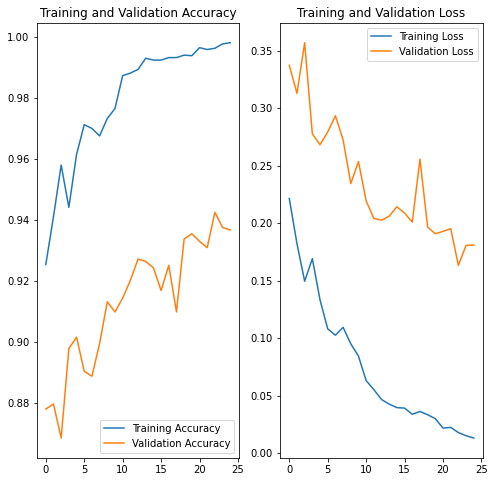

In [96]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


15代：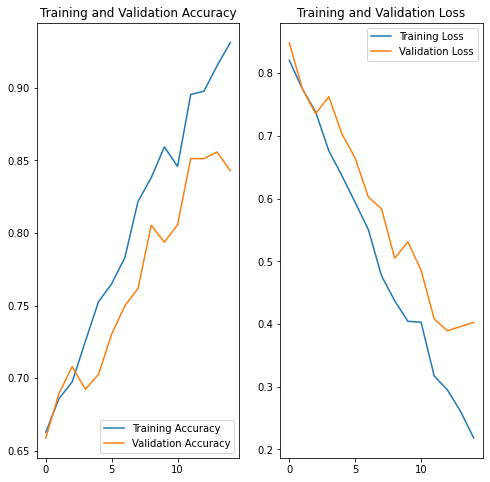
25代：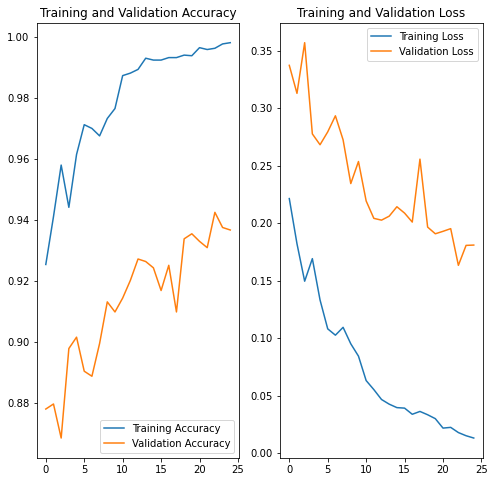

### 预测

In [6]:
model = load_model("./Model/rice_0.93.h5")

In [81]:
path_test = './test/'
test_list=[]
test_list=glob.glob(path_test+'/*.jpg')
imgs=[]                                                                                         
for im in glob.glob(path_test+'/*.jpg'):  
    print(im)
    img=cv2.imread(im) 
    img=cv2.resize(img,(w,h))                           
    imgs.append(img)                       
imgs = np.asarray(imgs,np.float32)
print("shape of data:",imgs.shape) 

./test\test1.jpg
./test\test10.jpg
./test\test11.jpg
./test\test12.jpg
./test\test13.jpg
./test\test14.jpg
./test\test15.jpg
./test\test16.jpg
./test\test17.jpg
./test\test18.jpg
./test\test19.jpg
./test\test2.jpg
./test\test20.jpg
./test\test21.jpg
./test\test22.jpg
./test\test23.jpg
./test\test24.jpg
./test\test25.jpg
./test\test26.jpg
./test\test27.jpg
./test\test28.jpg
./test\test29.jpg
./test\test3.jpg
./test\test30.jpg
./test\test31.jpg
./test\test32.jpg
./test\test33.jpg
./test\test34.jpg
./test\test35.jpg
./test\test36.jpg
./test\test37.jpg
./test\test38.jpg
./test\test39.jpg
./test\test4.jpg
./test\test40.jpg
./test\test41.jpg
./test\test42.jpg
./test\test43.jpg
./test\test44.jpg
./test\test45.jpg
./test\test46.jpg
./test\test47.jpg
./test\test5.jpg
./test\test6.jpg
./test\test7.jpg
./test\test8.jpg
./test\test9.jpg
shape of data: (47, 100, 100, 3)


[2 2 0 2 0 0 0 1 1 2 0 2 0 0 1 1 1 0 1 3 1 1 2 1 1 3 1 1 1 3 2 2 3 2 3 3 0
 3 3 2 3 3 2 2 2 1 2]


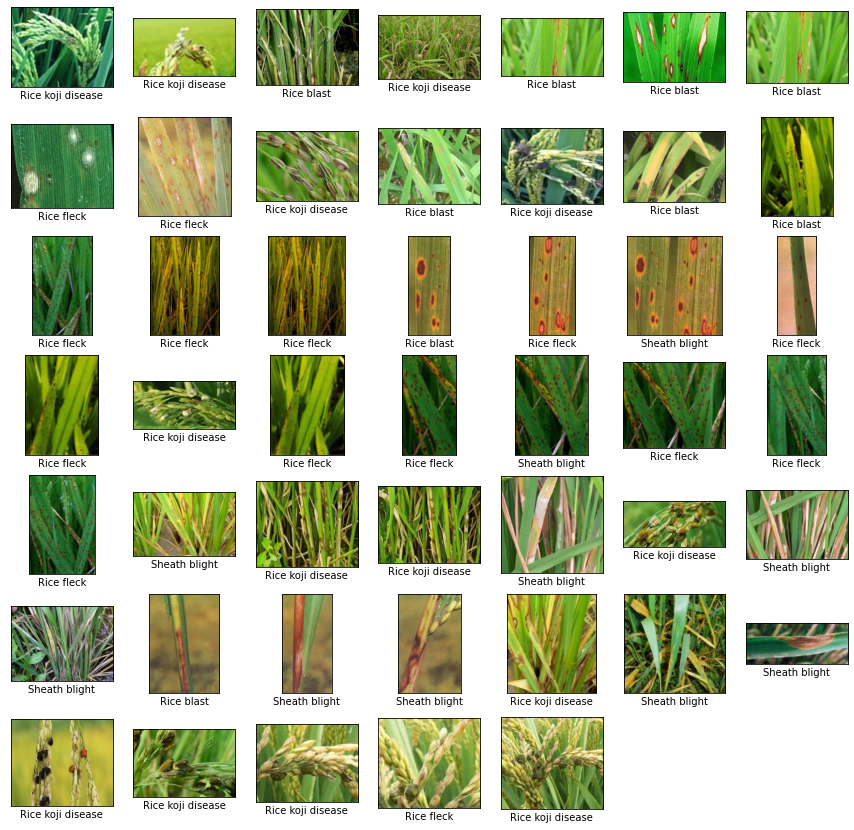

In [83]:
prediction = np.argmax(model.predict(imgs), axis=-1)
print(prediction)
plt.figure(figsize=(15,15))
for i in range(np.size(prediction)):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = plt.imread(test_list[i])
    plt.grid(False)
    plt.imshow(img,cmap=plt.cm.binary)
    plt.xlabel(flower_dict[prediction[i]])
plt.show() 

In [24]:
model.save('./Model/rice_0.93.h5')


In [5]:
tf.keras.models.save_model(model,"./Model/rice_0.93_2.0.pb") 
print('模型已保存')

INFO:tensorflow:Assets written to: ./Model/rice_0.93_2.0.pb\assets
模型已保存
